<a href="https://colab.research.google.com/github/ronmaccms/graphML/blob/staging-v1/class-work/Andres_Roncal_AIA24_GraphML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introduction to Graphs with NetworkX**

In this session you will learn about the basic concepts of graphs and networks by exploring the networkX library for python.

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With networkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

This course and notebook is based and inspired on the book Graph Machine Learning by Claudio Stamile, Aldo Marzullo, Enrico Deusebio

---

**NetworkX references:**

tutorial: https://networkx.org/documentation/stable/tutorial.html

reference: https://networkx.org/documentation/stable/reference/index.html

#**1.1 Import NetworkX**

In [1]:
import networkx as nx
#Check nx version
nx.__version__

'3.3'

#**1.2 Build a Graph**

The first basic element of a graph is a **Node** , which is a representative of some entity. For example, in social networks, a user can be a represented by a node. In buildings, a node can be a room in this building. In urban networks, we may choose to represent each street (or streets crosspoints) through a node.

The second element is an **Edge**, which tells us which nodes are connected together. So, for social networks, two nodes (users) may have an edge if one or both of them follow eachother. In buildings, if two nodes(rooms) are in the same side of the building, or maybe in the same floor and share a wall, they can have an edge.

---

In order to create a basic graph in networkx, we can start by creating an empty graph, that obviously has no nodes, and therefore no edges.

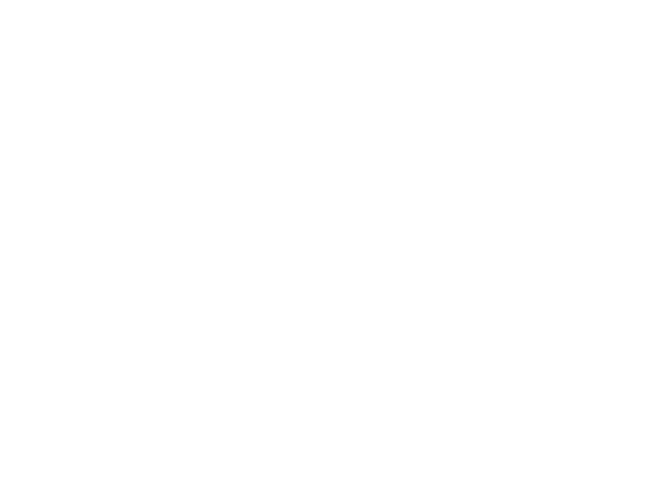

In [2]:
G = nx.Graph() #empty graph
nx.draw(G)     #draw the graph

In [3]:
G.nodes

NodeView(())

Let's now add some nodes to this graph

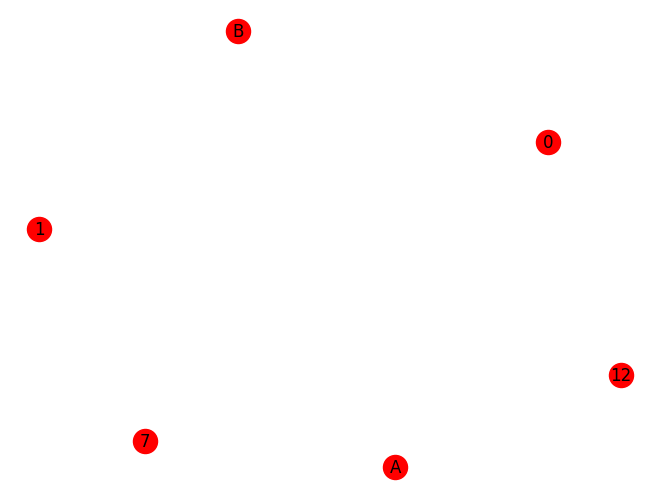

In [4]:
# this would solve the need to have to re run the cell above. keep in mind
# some code needs to share cells to optimize code.
G = nx.Graph() #empty graph
nx.draw(G)     #draw the graph

#each element in the following list is a graph node
Node_list=[0,1,12, "A", "B", 7] # keep in mind items can not duplicate, this is a set
G.add_nodes_from(Node_list)

#Visualize the graph
nx.draw(G, with_labels=True, node_color="red")

In [5]:
G.nodes

NodeView((0, 1, 12, 'A', 'B', 7))

In [6]:
G.edges

EdgeView([])

Connect the nodes by edges

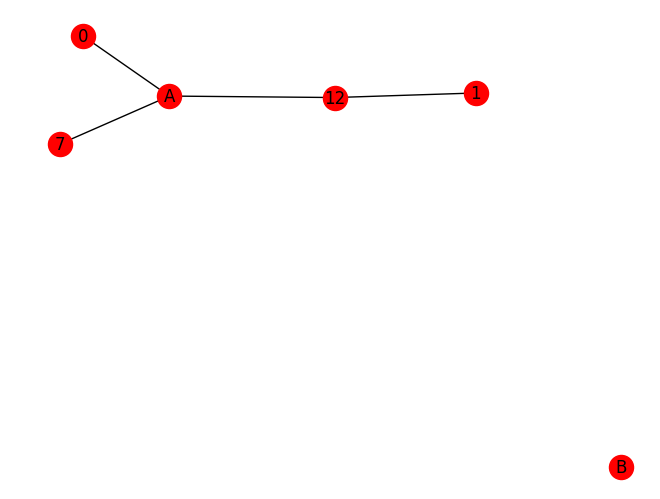

In [7]:
#an edge list is just a list of tuples, in which each tuple contains the two nodes to be connected
Edge_list= [(0,"A") , (1,12) , ("A",7), (12,"A")]
G.add_edges_from(Edge_list)
nx.draw(G, with_labels=True, node_color="red", edge_color="k")

Notice that the nodes positions are changed at each time you re run the visualization line, networks assign random location for nodes if you don't explicitly fix these locations. In order to do so, we need to define a **Layout**.



In [8]:
pos=nx.spring_layout(G) # pos=nx.spring_layout(G) original | pos=nx.circular_layout(G)

**Notice** that the layout is nothing more than a dictionary, in which the keys are the nodes ids and values by (x,y) locations

In [9]:
pos

{0: array([-0.16826208, -0.10163488]),
 1: array([ 0.24124508, -0.49561976]),
 12: array([ 0.14301868, -0.32610186]),
 'A': array([ 0.0287223 , -0.12747134]),
 'B': array([-0.35489307,  1.        ]),
 7: array([0.11016908, 0.05082784])}

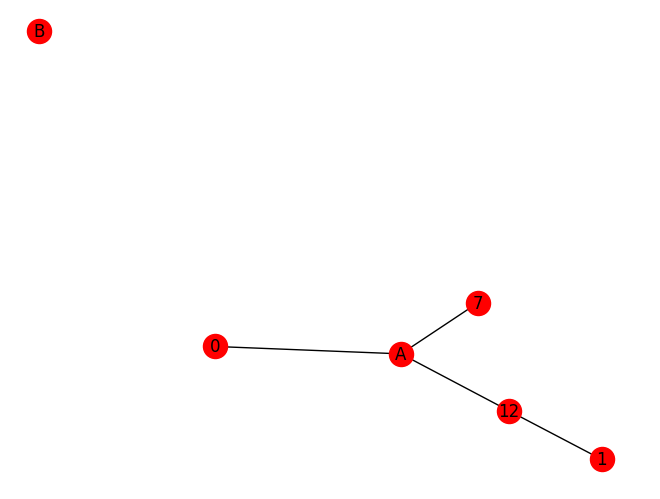

In [10]:
nx.draw(G, with_labels=True, node_color="red", edge_color="k", pos=pos)

Another Example:

In [11]:
G = nx.Graph()
V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]

G.add_nodes_from(V)
G.add_edges_from(E)

In [12]:
#query the nodes
G.nodes

NodeView(('Dublin', 'Paris', 'Milan', 'Rome'))

In [13]:
#query the nodes
G.edges

EdgeView([('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')])

In [14]:
#iterate through the nodes
for n in G.nodes:
  print(f"The city is {n}") #string formatting

The city is Dublin
The city is Paris
The city is Milan
The city is Rome


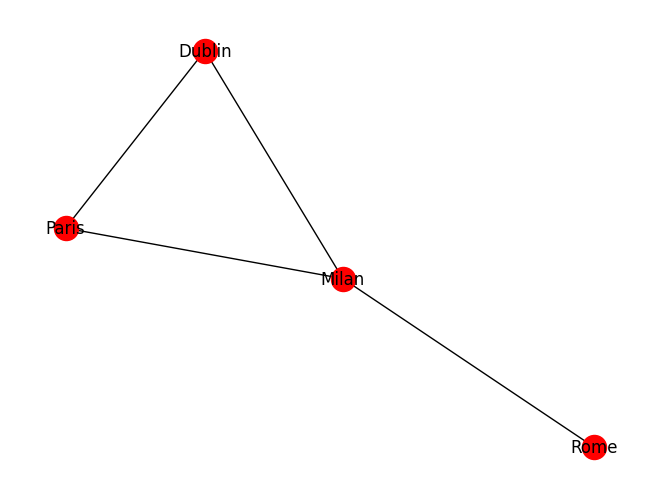

In [15]:
nx.draw(G, with_labels=True, node_color="red", edge_color="k")

In the previous graphs, you can see that the directions don't matter, so going from **Node 0** to **Node A** is the same as from **Node A** to **Node 0**... If we want specify certain directions, that can for example reprsent streets directions for traffic, we can build a **DirectedGraph**.

In [16]:
G=nx.DiGraph()

In [17]:
Node_list=[0,1,12,"A","B",7]
G.add_nodes_from(Node_list)

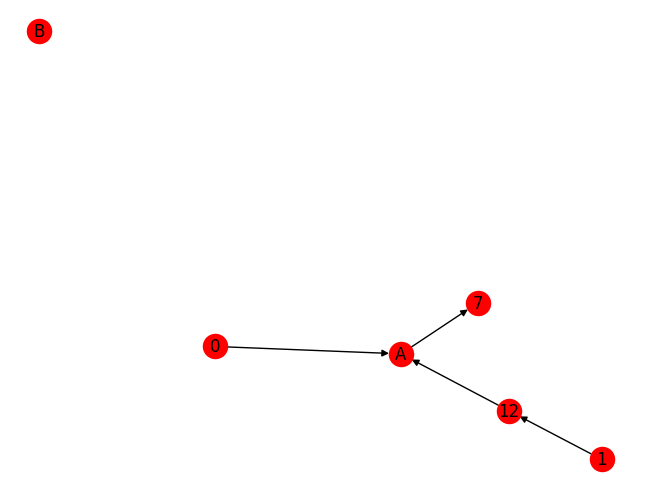

In [18]:
Edge_list= [(0,"A") , (1,12) , ("A",7), (12,"A")]
G.add_edges_from(Edge_list)
#we can use the same layout we created before since we have the same nodes
nx.draw(G, with_labels=True, node_color="red", edge_color="k", pos=pos)

Now you can go from Node 0 to Node A but you can't go from A to 0. Let's add an edge A to 0.

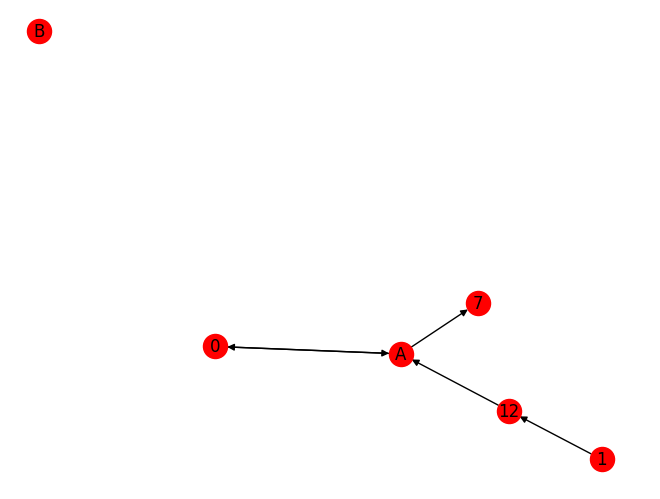

In [19]:
G.add_edges_from([("A", 0)])
nx.draw(G, with_labels=True, node_color="red", edge_color="k",pos=pos)

---

#**1.3 Basic Metrics**

**Order**

The order of a graph is the number of its vertices |V|.

In [26]:
print(f"Graph Order: {G.number_of_nodes()}") #G here is the last graoh we created in the previous section

Graph Order: 6


**Size**

The size of a graph is the number of its edges |E|.


In [27]:
print(f"Graph Size: {G.number_of_edges()}")

Graph Size: 5


**Degree**

The degree of a vertex is the number of edges that are adjacent to it.

In [28]:
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }") #notice that Node A has a degree of 4, sice edge A-O is different to edge 0-A....same for Node 0

Degree for nodes: {0: 2, 1: 1, 12: 2, 'A': 4, 'B': 0, 7: 1}


**Neighbors**

The neighbors of a vertex v in a graph G is a subset of vertex V′ induced by all vertices adjacent to v.

In [29]:
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Neighbors for nodes: {0: ['A'], 1: [12], 12: ['A'], 'A': [7, 0], 'B': [], 7: []}


**Egograph**
Induced subgraph of neighbors centered at node n **within a given radius**

In [30]:
ego_graph_A = nx.ego_graph(G, "A",undirected=True) #if undirected=True use both in- and out-neighbors of directed graphs.
print(ego_graph_A.edges)
print(ego_graph_A.nodes)

[(0, 'A'), (12, 'A'), ('A', 7), ('A', 0)]
[0, 12, 'A', 7]


In [31]:
ego_graph_A = nx.ego_graph(G, "A",radius=2,undirected=True)
print(ego_graph_A.edges)
print(ego_graph_A.nodes)

[(0, 'A'), (1, 12), (12, 'A'), ('A', 7), ('A', 0)]
[0, 1, 12, 'A', 7]


---

# **1.4 Graph modification**

In [32]:
G = nx.Graph()
V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]

G.add_nodes_from(V)
G.add_edges_from(E)

Adding nodes to graphs

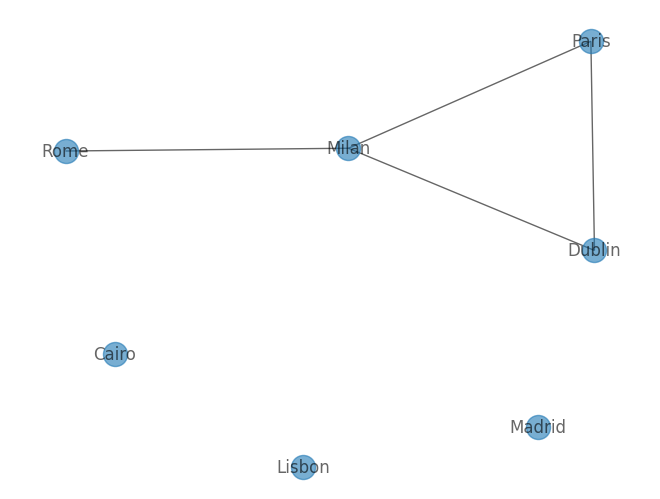

In [33]:
# basic add nodes
G.add_node('Cairo') #this is how you add nodes to graphs
G.add_nodes_from( ['Lisbon', 'Madrid'] ) #nodes can me named anything

pos=nx.kamada_kawai_layout(G) #add a layout
nx.draw(G, with_labels=True, alpha=0.6, pos=pos)

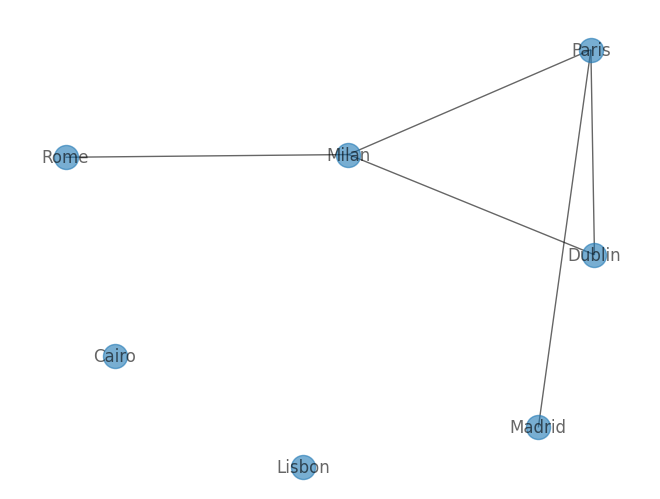

In [34]:
G.add_edge('Paris','Madrid')
nx.draw(G, with_labels=True, alpha=0.6 , pos=pos)

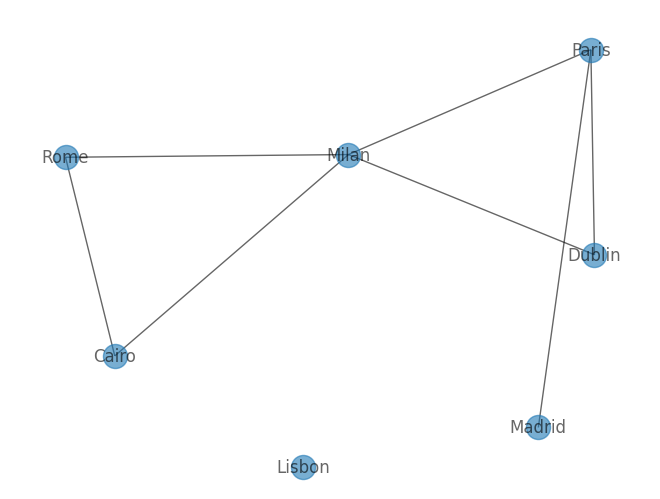

In [35]:
new_edges = [('Rome','Cairo'), ('Cairo','Milan') ]
G.add_edges_from( new_edges )
nx.draw(G, with_labels=True, alpha=0.6 , pos=pos)

In [36]:
G.edges

EdgeView([('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Paris', 'Madrid'), ('Milan', 'Rome'), ('Milan', 'Cairo'), ('Rome', 'Cairo')])

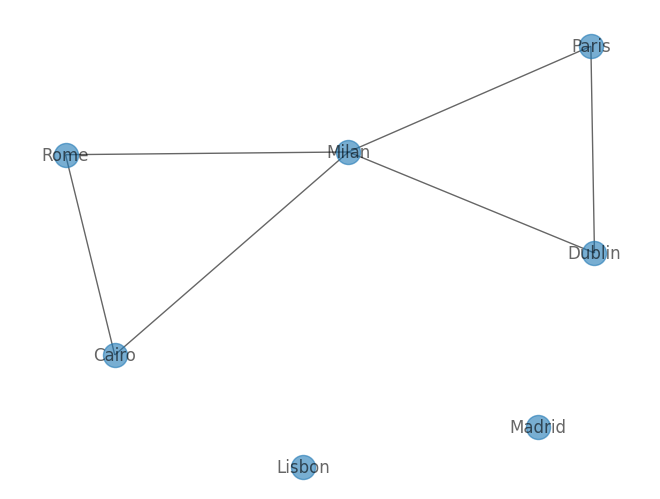

In [37]:
G.remove_edge('Paris','Madrid' )
#G.remove_edges_from(new_edges)
nx.draw(G, with_labels=True, alpha=0.6 , pos=pos)

remove nodes

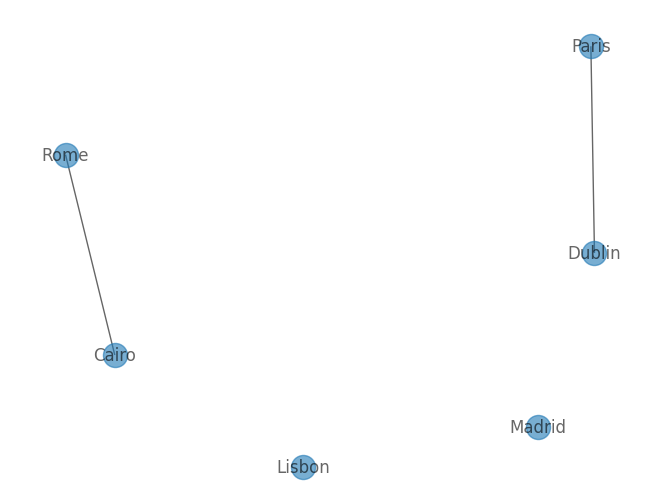

In [38]:
#G.remove_node('Cairo')
G.remove_nodes_from(['Milan'] )
nx.draw(G, with_labels=True, alpha=0.6 , pos=pos)

#**1.5 Graph Types**

### DiGraphs

A digraph G is defined as a couple G=(V, E), where V={v1, .., vn} is a set of nodes and
E={(vk,vw ) .., (vi,vj)} is a set of ordered couples representing the connection between
two nodes belonging to V.

In [39]:
DG = nx.DiGraph() #initializes a Directed Graph
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [ ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Rome', 'Milan')]
DG.add_nodes_from(V)
DG.add_edges_from(E)

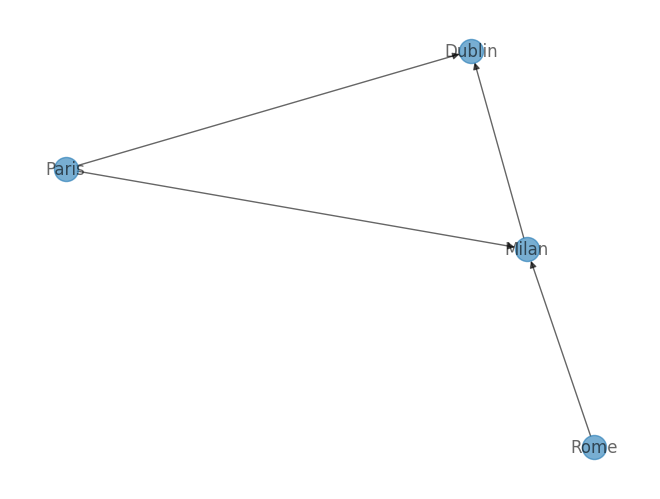

In [40]:
pos=nx.kamada_kawai_layout(DG) #add a layout
nx.draw(DG, with_labels=True, alpha=0.6, pos=pos)


**Indegree and outdegree**

For a vertex v, the number of head ends adjacent to v is called the indegree
,while the number of tail ends adjacent to v is its
outdegree.

In [41]:
print(f"Indegree for nodes: { {v: DG.in_degree(v) for v in DG.nodes} }")
print(f"Outdegree for nodes: { {v: DG.out_degree(v) for v in DG.nodes} }")

Indegree for nodes: {'Milan': 2, 'Dublin': 2, 'Paris': 0, 'Rome': 0}
Outdegree for nodes: {'Milan': 1, 'Dublin': 0, 'Paris': 2, 'Rome': 1}


### MultiGraph



An **undirected graph** class that can **store multiedges**.

In [42]:
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [
    ('Milan','Dublin'),
    ('Dublin', 'Milan'),
    ('Paris','Milan'),
    ('Paris','Dublin'),
    ('Rome', 'Milan'),
    ('Milan','Rome')
    ]

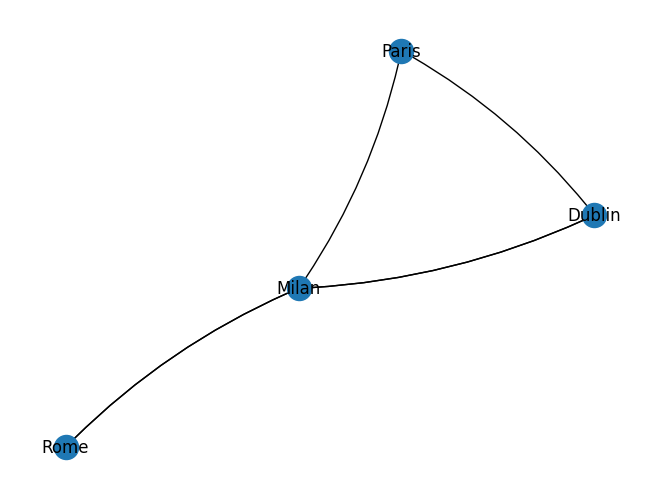

In [43]:
DMG  = nx.MultiGraph()
DMG.add_nodes_from(V)
DMG.add_edges_from(E)

pos = nx.spring_layout(DMG)
nx.draw(DMG, pos, with_labels=True, connectionstyle='arc3, rad = 0.1', arrows = True)


In [44]:
print(DMG.edges())

[('Milan', 'Dublin'), ('Milan', 'Dublin'), ('Milan', 'Paris'), ('Milan', 'Rome'), ('Milan', 'Rome'), ('Dublin', 'Paris')]


Notice that the edges are given the same name even though they wre named differently when creating the graph.. For example (Milan, Dublin) and (Dublin, Milan) both became (Milan, Dublin).. **in the following section, the direction is respected.**

### MultiDiGraph

A **directed graph** class that can **store multiedges**.

In [45]:
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [
    ('Milan','Dublin'),
    ('Dublin', 'Milan'),
    ('Paris','Milan'),
    ('Paris','Dublin'),
    ('Rome', 'Milan'),
    ('Milan','Rome')
    ]

Directed multi-graph

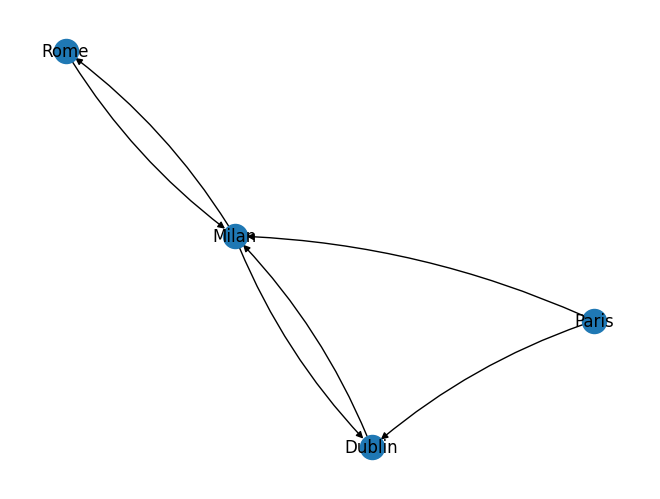

In [46]:
DMG  = nx.MultiDiGraph()
DMG.add_nodes_from(V)
DMG.add_edges_from(E)

pos = nx.spring_layout(DMG)
nx.draw(DMG, pos, with_labels=True, connectionstyle='arc3, rad = 0.1', arrows = True)


In [47]:
print(DMG.edges())

[('Milan', 'Dublin'), ('Milan', 'Rome'), ('Dublin', 'Milan'), ('Paris', 'Milan'), ('Paris', 'Dublin'), ('Rome', 'Milan')]


Now (Milan, Duplin) and (Duplin, Milan) are not the same.

### Weighted Graphs

In [48]:
import matplotlib.pyplot as plt

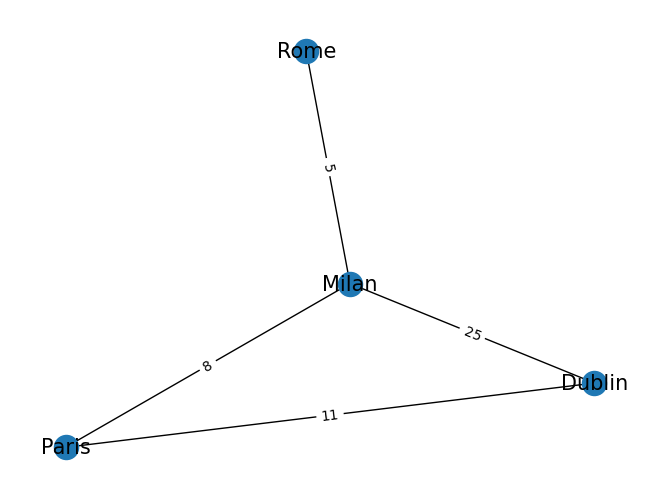

In [49]:
WG = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}

E = [ ('Milan','Dublin', 25), ('Paris','Milan', 8), ('Paris','Dublin', 11), ('Milan','Rome', 5) ]

WG.add_nodes_from(V)
WG.add_weighted_edges_from(E) #adds weighted edges

pos = nx.spring_layout(WG, seed=0)
nx.draw(WG, pos)
labels = nx.get_edge_attributes(WG,'weight')

nx.draw_networkx_labels(WG, pos, font_size=15 )
nx.draw_networkx_edge_labels(WG,pos,edge_labels=labels)

plt.show()

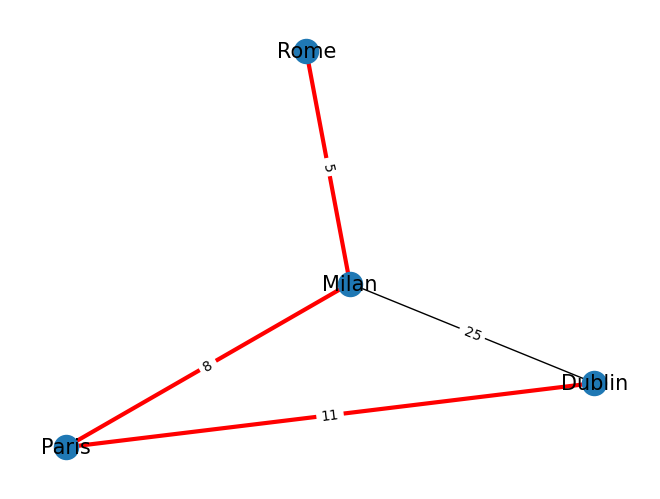

In [50]:
#calculate dijkstra path

source = 'Rome'
target = 'Dublin'

sp = nx.dijkstra_path(WG, source, target)

edgelist = [[sp[i], sp[i+1]] for i in range(len(sp)-1)]

nx.draw(WG, pos)
nx.draw_networkx_edges(WG, pos, edgelist, edge_color='r', width=3.)
labels = nx.get_edge_attributes(WG, 'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_labels(WG, pos, font_size=15 )
plt.show()

In [51]:
weights = nx.get_edge_attributes(WG, 'weight')
weights

{('Milan', 'Dublin'): 25,
 ('Milan', 'Paris'): 8,
 ('Milan', 'Rome'): 5,
 ('Dublin', 'Paris'): 11}

If we want to get the dijkstra path in terms of the **topological distance rather than the edge weights**,  we can ignore the edge attribute called "weight" we created before.

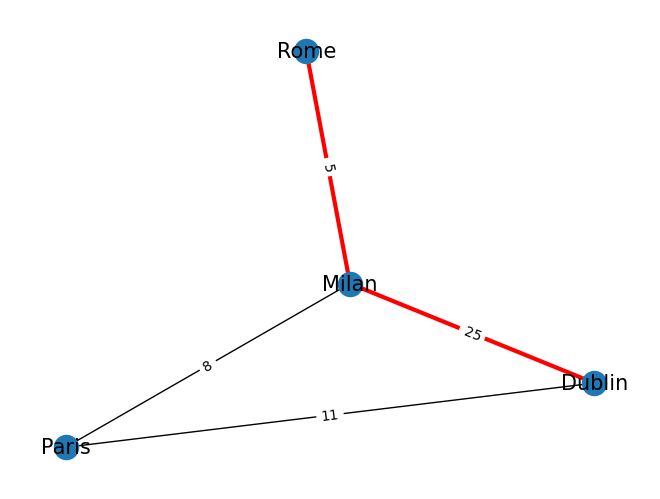

In [52]:
#calculate dijstra path

source = 'Rome'
target = 'Dublin'

sp = nx.dijkstra_path(WG, source, target, weight=None)
edgelist = [[sp[i], sp[i+1]] for i in range(len(sp)-1)]

nx.draw(WG, pos)
nx.draw_networkx_edges(WG, pos, edgelist, edge_color='r', width=3.)
labels = nx.get_edge_attributes(WG, 'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_labels(WG, pos, font_size=15 )
plt.show()

#**1.6 Graph Properties**
Graphs have some properties that are specific to them. These metrics are really important for their representation in ML

### Integration metrics

These measure how nodes tend to be interconnected with each other.

#### <font color="blue" >Distance, path, and shortest path
In particular, consider a source node and a target node . **The set of edges connecting node to node is called a path**. When studying complex networks, we are often interested in finding the shortest path between two nodes. **A shortest path between a source node and a target node is the path having the lowest number of edges compared to all the possible paths between**. The diameter of a network is the number of edges contained in the longest shortest path among all possible shortest paths.

In [81]:
G = nx.Graph()
V = ['Dublin', 'Paris','Milan','Rome','Naples', 'Moscow','Tokyo']

G.add_nodes_from(V)
G.add_edges_from([
    ( 'Dublin', 'Paris'),
    ('Dublin', 'Milan'),
    ('Paris','Milan'),
    ('Milan','Rome'),
    ('Rome','Naples'),
    ('Naples', 'Moscow'),
    ('Naples', 'Tokyo'),
    ('Moscow','Tokyo')
])


{}

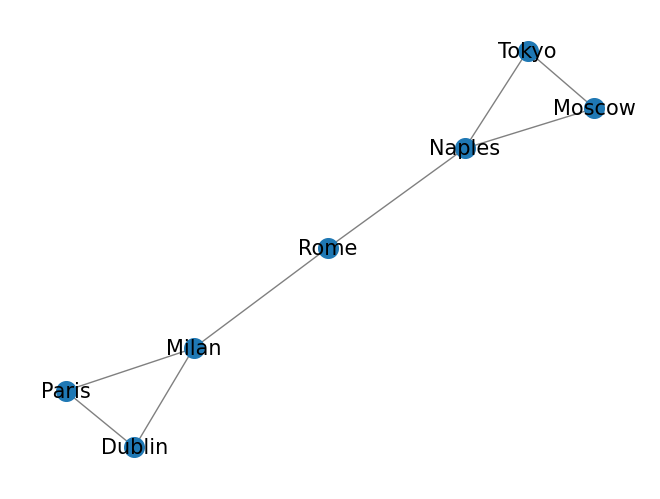

In [82]:
pos = nx.spring_layout(G, seed = 0)
nx.draw(G, pos, with_labels=True, font_size=15, node_size=200, edge_color='gray')

edge_labels=nx.get_edge_attributes(G,'weight') #notice we didn't set an edge attribute called "wight" to this graph, that's why we will get an empty dictionary out of this line
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



In [83]:
edge_labels

{}

In [84]:
source = 'Dublin'
target = 'Tokyo'

path = nx.dijkstra_path(G, source, target)
path

['Dublin', 'Milan', 'Rome', 'Naples', 'Tokyo']

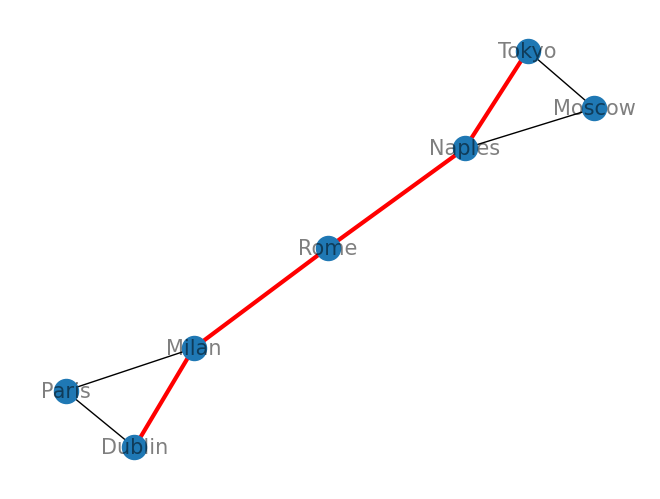

In [85]:
nx.draw(G, pos)
edgelist = [[path[i], path[i+1]] for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist, edge_color='r', width=3.)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_labels(G, pos, font_size=15, alpha = 0.5  )
plt.show()

In [86]:
G.edges(data=True)

EdgeDataView([('Dublin', 'Paris', {}), ('Dublin', 'Milan', {}), ('Paris', 'Milan', {}), ('Milan', 'Rome', {}), ('Rome', 'Naples', {}), ('Naples', 'Moscow', {}), ('Naples', 'Tokyo', {}), ('Moscow', 'Tokyo', {})])

Now let's add some random weights to the graph...

In [87]:
import random

In [88]:
for u,v,data in G.edges(data=True):
  G[u][v]['weight'] = random.randint(1,5)

In [89]:
G.edges(data=True)

EdgeDataView([('Dublin', 'Paris', {'weight': 1}), ('Dublin', 'Milan', {'weight': 4}), ('Paris', 'Milan', {'weight': 3}), ('Milan', 'Rome', {'weight': 1}), ('Rome', 'Naples', {'weight': 5}), ('Naples', 'Moscow', {'weight': 4}), ('Naples', 'Tokyo', {'weight': 4}), ('Moscow', 'Tokyo', {'weight': 3})])

In [90]:
source = 'Dublin'
target = 'Tokyo'

path = nx.dijkstra_path(G, source, target)
path

['Dublin', 'Milan', 'Rome', 'Naples', 'Tokyo']

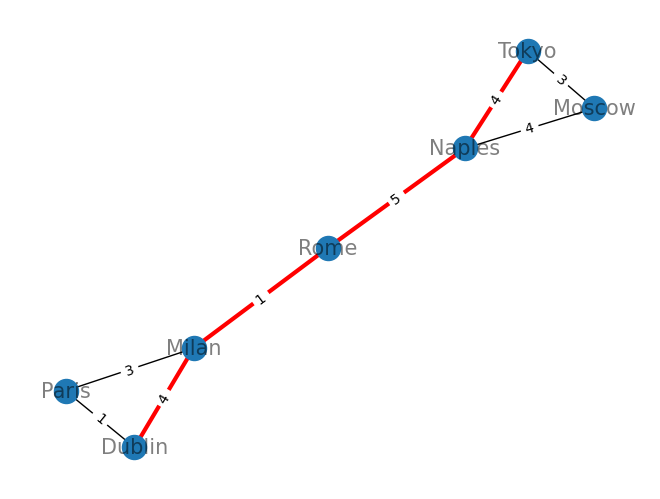

In [91]:
nx.draw(G, pos)

edgelist = [[path[i], path[i+1]] for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist, edge_color='r', width=3.)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)
nx.draw_networkx_labels(G, pos, font_size=15, alpha = 0.5 )
plt.show()

The **characteristic path length** is defined as the average of all the shortest path lengths between all possible pair of nodes. However, this metric cannot be always defined since it is not possible to compute a path among all the nodes in *disconnected graphs*. For this reason, network efficiency is also widely used.

In [92]:
nx.average_shortest_path_length(G)

2.1904761904761907

**Global efficiency** is the average of the inverse shortest path length for all pairs of nodes.
Such a metric can be seen as a measure of how efficiently information is exchanged across a network.

In [93]:
nx.global_efficiency(G)

0.611111111111111

**Average local efficiency** is computed in networkx using the following command

The local efficiency of a node in the graph is the average global efficiency of the **subgraph induced by the neighbors of the node**. The average local efficiency is the average of the local efficiencies of each node

In [94]:
nx.local_efficiency(G)

0.6666666666666667

### Segregation metrics
The clustering coefficient is a measure of how much nodes cluster together. It is defined as the fraction of triangles (complete subgraph of three nodes and three edges) around a node and is equivalent to the fraction of the node's neighbors that are neighbors of each other.

In [104]:
nx.average_clustering(G)

0.6666666666666667

The local clustering coefficient is computed in networkx using the following method:

In [105]:
clustering = nx.clustering(G)
clustering

{'Dublin': 1.0,
 'Paris': 1.0,
 'Milan': 0.3333333333333333,
 'Rome': 0,
 'Naples': 0.3333333333333333,
 'Moscow': 1.0,
 'Tokyo': 1.0}

Let's visualize each node according to its clustring coefficient

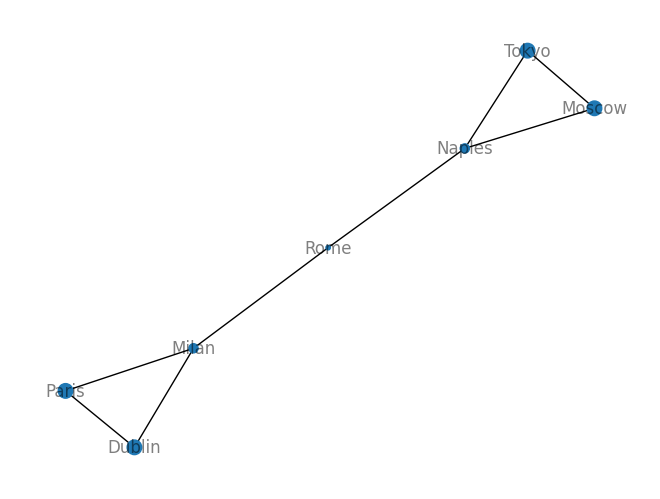

In [106]:
scalar = [ (n*100)+10 for n in list(clustering.values())]
nx.draw(G, pos,  node_size= scalar )
nx. draw_networkx_labels(G, pos, alpha = 0.5)
plt.show()

We can see that Tokyo, Moscow, Paris and Dublin have clustering coeffitient of 1, each has 2 neighbours and thay ar all connected (form a complete subgraph)

###Centrality metrics


One of the most common and simple centrality metrics is the **degree centrality metric**.

This is directly connected with the degree of a node, measuring the number of incident edges on a certain node.  Intuitively, the more a node is connected to an other node, the more its degree centrality will assume high values

In [107]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'Dublin': 0.3333333333333333,
 'Paris': 0.3333333333333333,
 'Milan': 0.5,
 'Rome': 0.3333333333333333,
 'Naples': 0.5,
 'Moscow': 0.3333333333333333,
 'Tokyo': 0.3333333333333333}

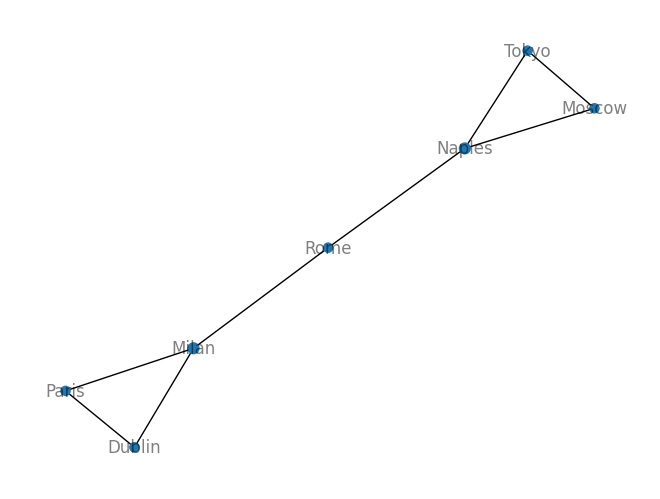

In [108]:
scalar = [ (n*100)+10 for n in list(degree_centrality.values())]
nx.draw(G, pos,   node_size= scalar )
nx. draw_networkx_labels(G, pos, alpha = 0.5)
plt.show()

The **closeness centrality** metric attempts to quantify how much a node is close (well connected) to other nodes. More formally, it refers to the average distance of a node to all other nodes in the network.

In [109]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

{'Dublin': 0.4,
 'Paris': 0.4,
 'Milan': 0.5454545454545454,
 'Rome': 0.6,
 'Naples': 0.5454545454545454,
 'Moscow': 0.4,
 'Tokyo': 0.4}

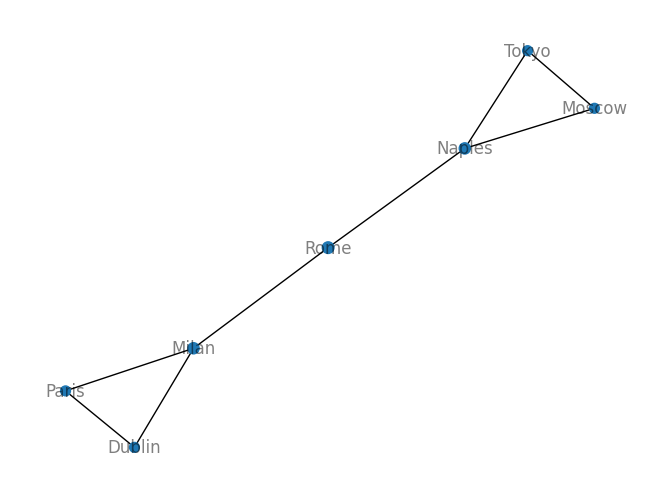

In [110]:
scalar = [ (n*100)+10 for n in list(closeness_centrality.values())]
nx.draw(G, pos,  node_size= scalar )
nx. draw_networkx_labels(G, pos, alpha = 0.5)
plt.show()

The **betweenness centrality** metric evaluates how much a node acts as a bridge between other nodes. Even if poorly connected, a node can be strategically connected, helping to keep the whole network connected

In [111]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{'Dublin': 0.0,
 'Paris': 0.0,
 'Milan': 0.5333333333333333,
 'Rome': 0.6,
 'Naples': 0.5333333333333333,
 'Moscow': 0.0,
 'Tokyo': 0.0}

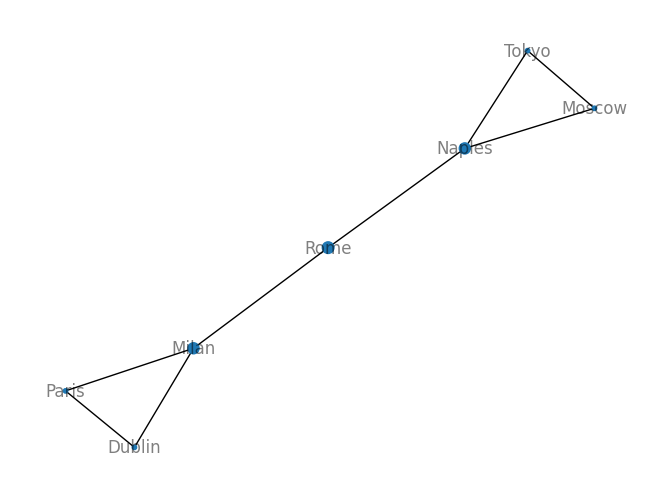

In [112]:
scalar = [ (n*100)+10 for n in list(betweenness_centrality.values())]
nx.draw(G, pos, node_size= scalar )
nx. draw_networkx_labels(G, pos, alpha = 0.5)
plt.show()

# **1.7 Graph Generators**

You can find many predefined graphs in the networkx reference:
https://networkx.org/documentation/stable/reference/generators.html

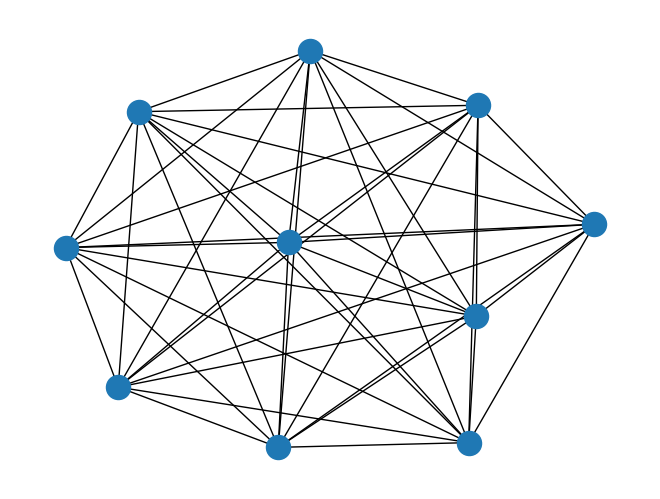

In [113]:
complete = nx.complete_graph(n=10) # a complete graph is a graph in wich all the nodes are directly connected to achother (each pair of nodes shares an edge)
nx.draw(complete)

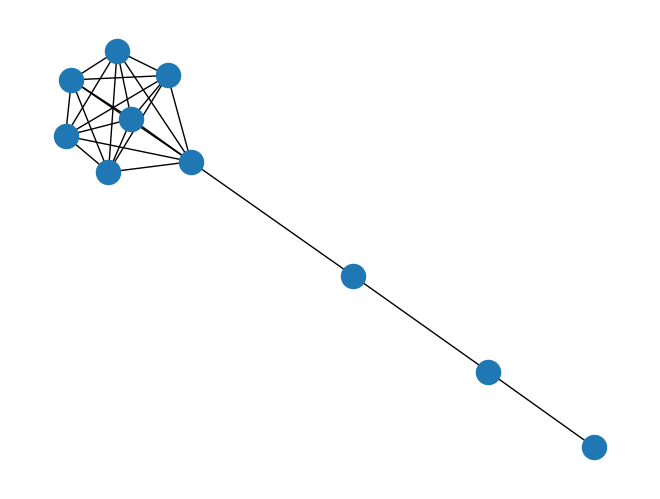

In [120]:
lollipop = nx.lollipop_graph(m=7, n=3)
nx.draw(lollipop)

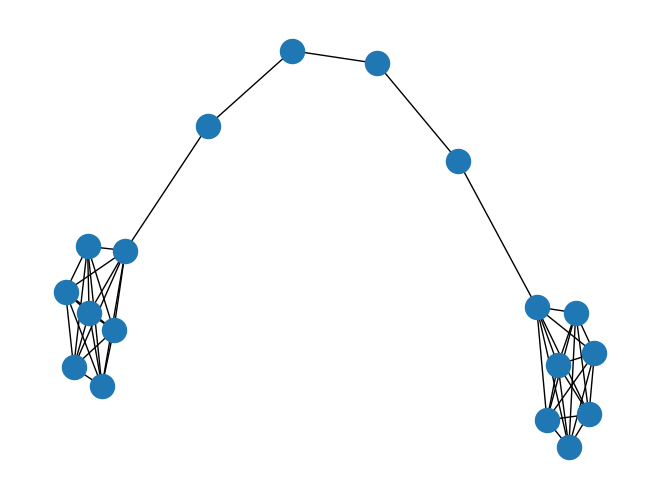

In [123]:
barbell = nx.barbell_graph(m1=7, m2=4)
nx.draw(barbell)

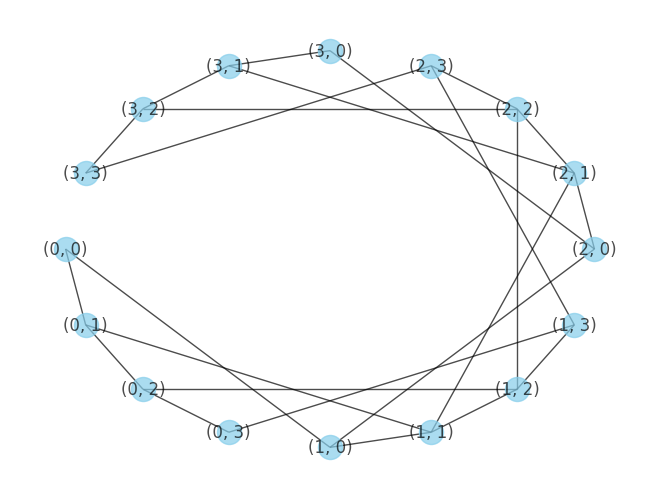

In [116]:
mesh = nx.grid_2d_graph(4,4)
mesh = nx.Graph.to_undirected(mesh)

pos = nx.shell_layout(mesh)
nx.draw(mesh, pos,  with_labels=True,  node_color="skyblue", alpha=0.7)

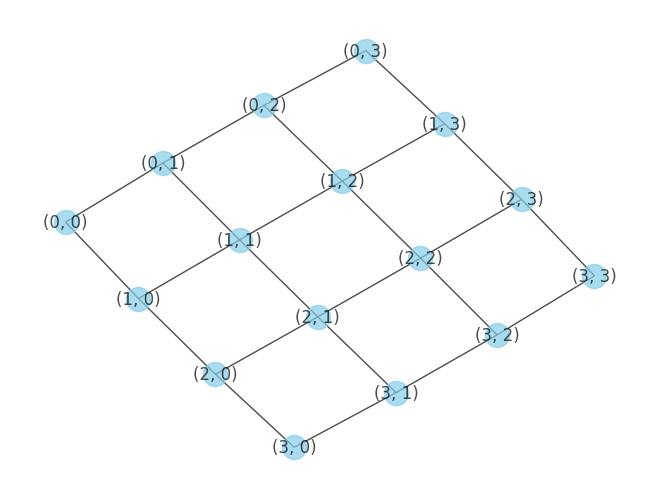

In [126]:
mesh = nx.grid_2d_graph(4,4)
mesh = nx.Graph.to_undirected(mesh)

pos = nx.kamada_kawai_layout(mesh)
nx.draw(mesh, pos,  with_labels=True,  node_color="skyblue", alpha=0.7)

In [211]:
data_csv = "Andres,Santos,15,Yes:John,Doe,5,Yes:Jane,Smith,10,No:Michael,Johnson,15,Yes:Emily,Brown,8,No:Christopher,Lee,3,Yes:Jessica,Wilson,12,No:Matthew,Taylor,20,Yes:White,20,Yes:Emma,Anderson,7,No:David,Thomas,11,Yes:Olivia,Jackson,6,No:Andrew,White,18,Yes:Ava,Harris,9,No:Daniel,Martin,4,Yes:Sophia,Garcia,13,No:James,Martinez,16,Yes:Isabella,Robinson,5,No:Joseph,Clark,14,Yes:Charlotte,Rodriguez,17,No:William,Lewis,2,Yes:Amelia,Lee,19,No:Benjamin,Walker,10,Yes:Samantha,Hall,3,No:Ethan,Young,8,Yes:Natalie,Allen,11,No:Sophia,Jackson,,Yes:Sophie,Thomas,12,Yes:Henry,Hall,16,No:Dylan,Baker,9,Yes:Lauren,Green,14,Yes:Sophie,Hughes,7,No:Sophia,Evans,18,Yes:Joshua,Richards,5,No:Lucas,Carter,10,Yes:Grace,Phillips,6,No:Charlie,Bell,8,No:Lily,King,17,Yes:Lucas,Hughes,13,No:Oliver,Evans,4,Yes:Zoe,Watson,19,No:Ruby,Cook,3,Yes:Alex,Gray,2,No"
entries = data_csv.split(':')
data_tuple = tuple(entries)
# names = [data_csv.split(':') for name in data_csv[0]]

print(data_tuple)
# print(names)

('Andres,Santos,15,Yes', 'John,Doe,5,Yes', 'Jane,Smith,10,No', 'Michael,Johnson,15,Yes', 'Emily,Brown,8,No', 'Christopher,Lee,3,Yes', 'Jessica,Wilson,12,No', 'Matthew,Taylor,20,Yes', 'White,20,Yes', 'Emma,Anderson,7,No', 'David,Thomas,11,Yes', 'Olivia,Jackson,6,No', 'Andrew,White,18,Yes', 'Ava,Harris,9,No', 'Daniel,Martin,4,Yes', 'Sophia,Garcia,13,No', 'James,Martinez,16,Yes', 'Isabella,Robinson,5,No', 'Joseph,Clark,14,Yes', 'Charlotte,Rodriguez,17,No', 'William,Lewis,2,Yes', 'Amelia,Lee,19,No', 'Benjamin,Walker,10,Yes', 'Samantha,Hall,3,No', 'Ethan,Young,8,Yes', 'Natalie,Allen,11,No', 'Sophia,Jackson,,Yes', 'Sophie,Thomas,12,Yes', 'Henry,Hall,16,No', 'Dylan,Baker,9,Yes', 'Lauren,Green,14,Yes', 'Sophie,Hughes,7,No', 'Sophia,Evans,18,Yes', 'Joshua,Richards,5,No', 'Lucas,Carter,10,Yes', 'Grace,Phillips,6,No', 'Charlie,Bell,8,No', 'Lily,King,17,Yes', 'Lucas,Hughes,13,No', 'Oliver,Evans,4,Yes', 'Zoe,Watson,19,No', 'Ruby,Cook,3,Yes', 'Alex,Gray,2,No')


In [213]:
social = [
    ('Andres', 'Santos', 15, 'Yes'), ('John', 'Doe', 5, 'Yes'), ('Jane', 'Smith', 10, 'No'),
    ('Michael', 'Johnson', 15, 'Yes'), ('Emily', 'Brown', 8, 'No'), ('Christopher', 'Lee', 3, 'Yes'),
    ('Jessica', 'Wilson', 12, 'No'), ('Matthew', 'Taylor', 20, 'Yes'), ('White', '', 20, 'Yes'),
    ('Emma', 'Anderson', 7, 'No'), ('David', 'Thomas', 11, 'Yes'), ('Olivia', 'Jackson', 6, 'No'),
    ('Andrew', 'White', 18, 'Yes'), ('Ava', 'Harris', 9, 'No'), ('Daniel', 'Martin', 4, 'Yes'),
    ('Sophia', 'Garcia', 13, 'No'), ('James', 'Martinez', 16, 'Yes'), ('Isabella', 'Robinson', 5, 'No'),
    ('Joseph', 'Clark', 14, 'Yes'), ('Charlotte', 'Rodriguez', 17, 'No'), ('William', 'Lewis', 2, 'Yes'),
    ('Amelia', 'Lee', 19, 'No'), ('Benjamin', 'Walker', 10, 'Yes'), ('Samantha', 'Hall', 3, 'No'),
    ('Ethan', 'Young', 8, 'Yes'), ('Natalie', 'Allen', 11, 'No'), ('Sophia', 'Jackson', None, 'Yes'),
    ('Sophie', 'Thomas', 12, 'Yes'), ('Henry', 'Hall', 16, 'No'), ('Dylan', 'Baker', 9, 'Yes'),
    ('Lauren', 'Green', 14, 'Yes'), ('Sophie', 'Hughes', 7, 'No'), ('Sophia', 'Evans', 18, 'Yes'),
    ('Joshua', 'Richards', 5, 'No'), ('Lucas', 'Carter', 10, 'Yes'), ('Grace', 'Phillips', 6, 'No'),
    ('Charlie', 'Bell', 8, 'No'), ('Lily', 'King', 17, 'Yes'), ('Lucas', 'Hughes', 13, 'No'),
    ('Oliver', 'Evans', 4, 'Yes'), ('Zoe', 'Watson', 19, 'No'), ('Ruby', 'Cook', 3, 'Yes'),
    ('Alex', 'Gray', 2, 'No')
]

names = [item[0] for item in social]

print(names)
print(social)

['Andres', 'John', 'Jane', 'Michael', 'Emily', 'Christopher', 'Jessica', 'Matthew', 'White', 'Emma', 'David', 'Olivia', 'Andrew', 'Ava', 'Daniel', 'Sophia', 'James', 'Isabella', 'Joseph', 'Charlotte', 'William', 'Amelia', 'Benjamin', 'Samantha', 'Ethan', 'Natalie', 'Sophia', 'Sophie', 'Henry', 'Dylan', 'Lauren', 'Sophie', 'Sophia', 'Joshua', 'Lucas', 'Grace', 'Charlie', 'Lily', 'Lucas', 'Oliver', 'Zoe', 'Ruby', 'Alex']
[('Andres', 'Santos', 15, 'Yes'), ('John', 'Doe', 5, 'Yes'), ('Jane', 'Smith', 10, 'No'), ('Michael', 'Johnson', 15, 'Yes'), ('Emily', 'Brown', 8, 'No'), ('Christopher', 'Lee', 3, 'Yes'), ('Jessica', 'Wilson', 12, 'No'), ('Matthew', 'Taylor', 20, 'Yes'), ('White', '', 20, 'Yes'), ('Emma', 'Anderson', 7, 'No'), ('David', 'Thomas', 11, 'Yes'), ('Olivia', 'Jackson', 6, 'No'), ('Andrew', 'White', 18, 'Yes'), ('Ava', 'Harris', 9, 'No'), ('Daniel', 'Martin', 4, 'Yes'), ('Sophia', 'Garcia', 13, 'No'), ('James', 'Martinez', 16, 'Yes'), ('Isabella', 'Robinson', 5, 'No'), ('Joseph